In [19]:
# Importing libraries
import numpy as np
import pandas as pd

# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Splitting data into training and testing set
from sklearn.model_selection import train_test_split

# Import the LabelEncoder module
from sklearn.preprocessing import LabelEncoder

# Modules for evaluation metrics
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, precision_score, recall_score

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
from subprocess import call

In [20]:
# Read the Titanic dataset from a CSV file into a DataFrame
df = pd.read_csv("titanic.csv")

# Display the first few rows of the DataFrame
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
# Understanding the structure and characteristics of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
# Dropping unnecessary columns
df = df.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1)
# PassengerId: Does not provide any useful information for predicting survival.
# Name: Does not provide any useful information for predicting survival
# Ticket: Contains alphanumeric values, which might not have a direct correlation with survival.
# Cabin: High number of missing values (NaN)




In [23]:
# Checking for missing data
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

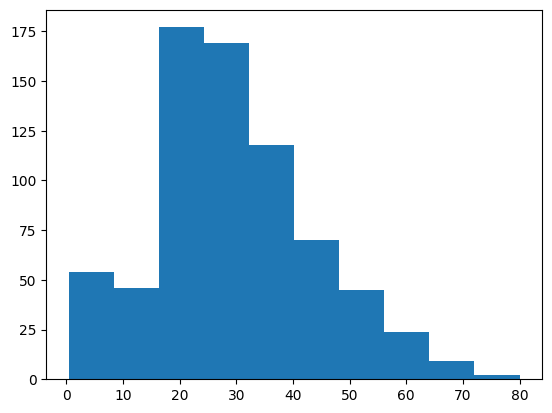

In [24]:
# Examining the distribution of the Age column to address any missing data
plt.hist(df['Age'])
plt.show()

In [25]:
# Using meadian to fill in missing data

# Calculate median
median_age = df['Age'].median()

# Impute missing age values with median
df['Age'] = df['Age'].fillna(median_age)

# Dropping x2 nan values
df = df.dropna(subset=['Embarked'])

# Checking changes
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [26]:
# Get the data types of all columns
data_types = df.dtypes

# Loop through each column
for column, data_type in data_types.items():  # Use items() to iterate through column and data_type
    if data_type == 'object':
        unique_values = df[column].unique()
        print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'Sex': ['male' 'female']
Unique values in column 'Embarked': ['S' 'C' 'Q']


In [27]:
# Encoding categorical features 

# Initialise the LabelEncoder
encoder = LabelEncoder()

# Fit and transform the "Sex" column
df['Sex'] = encoder.fit_transform(df['Sex'])

# Fit and transform the "Embarked" column
df['Embarked'] = encoder.fit_transform(df['Embarked'])

# Checking changes
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [28]:
# X represents the feature set (independent variables) for your model
X = df.drop('Survived', axis=1)
# y represents the target variable (dependent variable) for your model
y = df['Survived']

In [29]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Generate an instance of a Decision Tree classifier class
unpruned = DecisionTreeClassifier()

In [31]:
# Train Decision Tree Classifer
unpruned.fit(X_train,y_train)

# Predict the response for test dataset
y_train_pred = unpruned.predict(X_train)
y_test_pred = unpruned.predict(X_test)

# Model Accuracy and Confusion Matrix, how often is the classifier correct
print(f'Training Accuracy: {accuracy_score(y_train, y_train_pred)}')
print(f'Testing Accuracy without pruning: {accuracy_score(y_test, y_test_pred)}')
print("At depth:", unpruned.tree_.max_depth)
print("Performance without pruning:", unpruned.score(X_test, y_test))

Training Accuracy: 0.9845288326300985
Testing Accuracy without pruning: 0.7359550561797753
At depth: 20
Performance without pruning: 0.7359550561797753


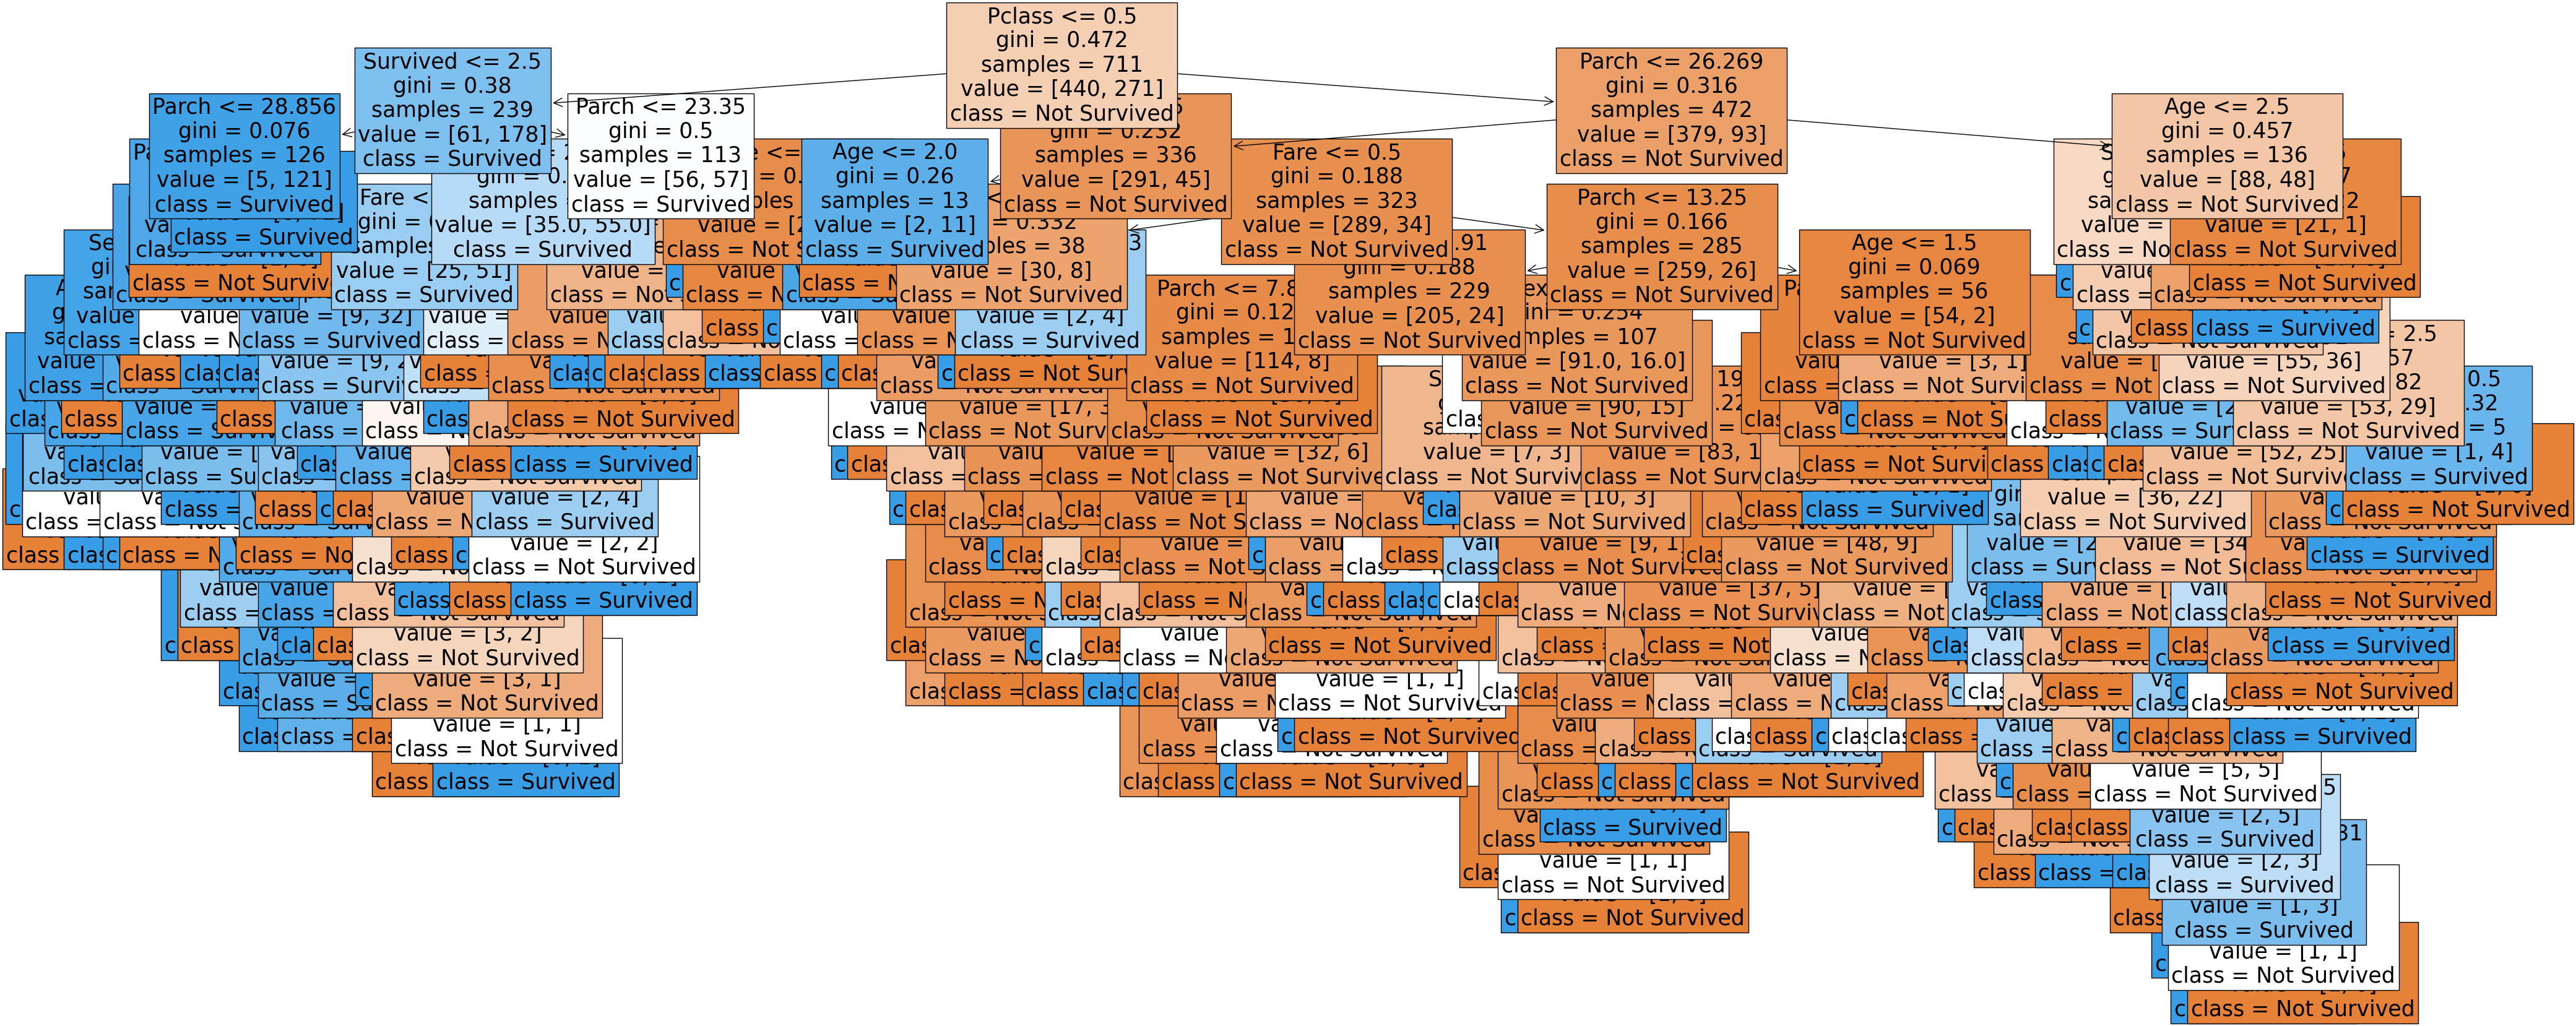

In [32]:
# Creating Visualisation with unprunned tree
plt.figure(figsize=(50,20))
features = df.columns
classes = ['Not Survived','Survived']
tree.plot_tree(unpruned,feature_names=features,class_names=classes,filled=True,fontsize=25)
plt.show()

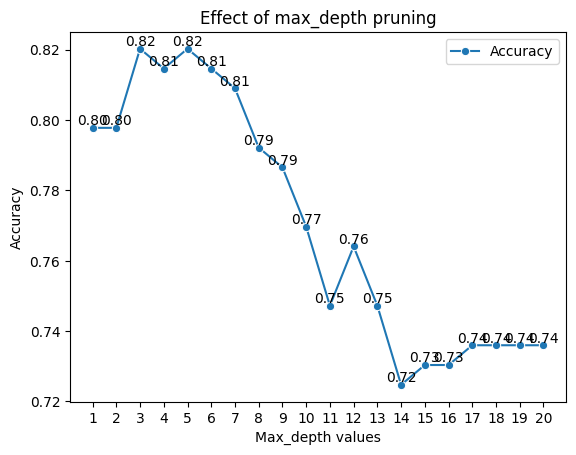

In [33]:
# Effect of max_depth pruning  

# Assign the variable pruned_depths
pruned_depths = range(1,unpruned.tree_.max_depth+1)

# Creating a for loop to obtain the accuracy for each depth
pruned_scores = [] 
for d in pruned_depths:
  clf = DecisionTreeClassifier(max_depth=d, random_state=1)
  clf.fit(X_train, y_train)
  score = clf.score(X_test, y_test)
  pruned_scores.append(score)

# Creating a visualisation to represent the accuracy at different depths
sns.lineplot(x=pruned_depths,y=pruned_scores, marker="o")
plt.legend(["Accuracy"])
plt.title("Effect of max_depth pruning")
plt.xlabel("Max_depth values")
plt.ylabel("Accuracy")
plt.xticks(range(1, unpruned.tree_.max_depth + 1))

# Add the value to the plot for each score
for d, score in zip(pruned_depths, pruned_scores):
    plt.text(d, score, f'{score:.2f}', ha='center', va='bottom')

plt.show()

In [35]:
# fitting the chosen tree
best_depth = pruned_depths[np.argmax(pruned_scores)]
print('Best performance reached at depth of:', best_depth)

#pruned = DecisionTreeClassifier(max_depth=best_depth,random_state=r)
pruned = DecisionTreeClassifier(criterion="entropy", max_depth=best_depth,random_state=42,min_samples_leaf=2)

# Train Decision Tree Classifer
pruned.fit(X_train,y_train)

#Predict the response for test dataset
y_test_pred = pruned.predict(X_test)

# Model Accuracy, how often is the classifier correct
print("Training Accuracy:",accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:",accuracy_score(y_test, y_test_pred))

Best performance reached at depth of: 3
Training Accuracy: 0.9845288326300985
Testing Accuracy: 0.8202247191011236


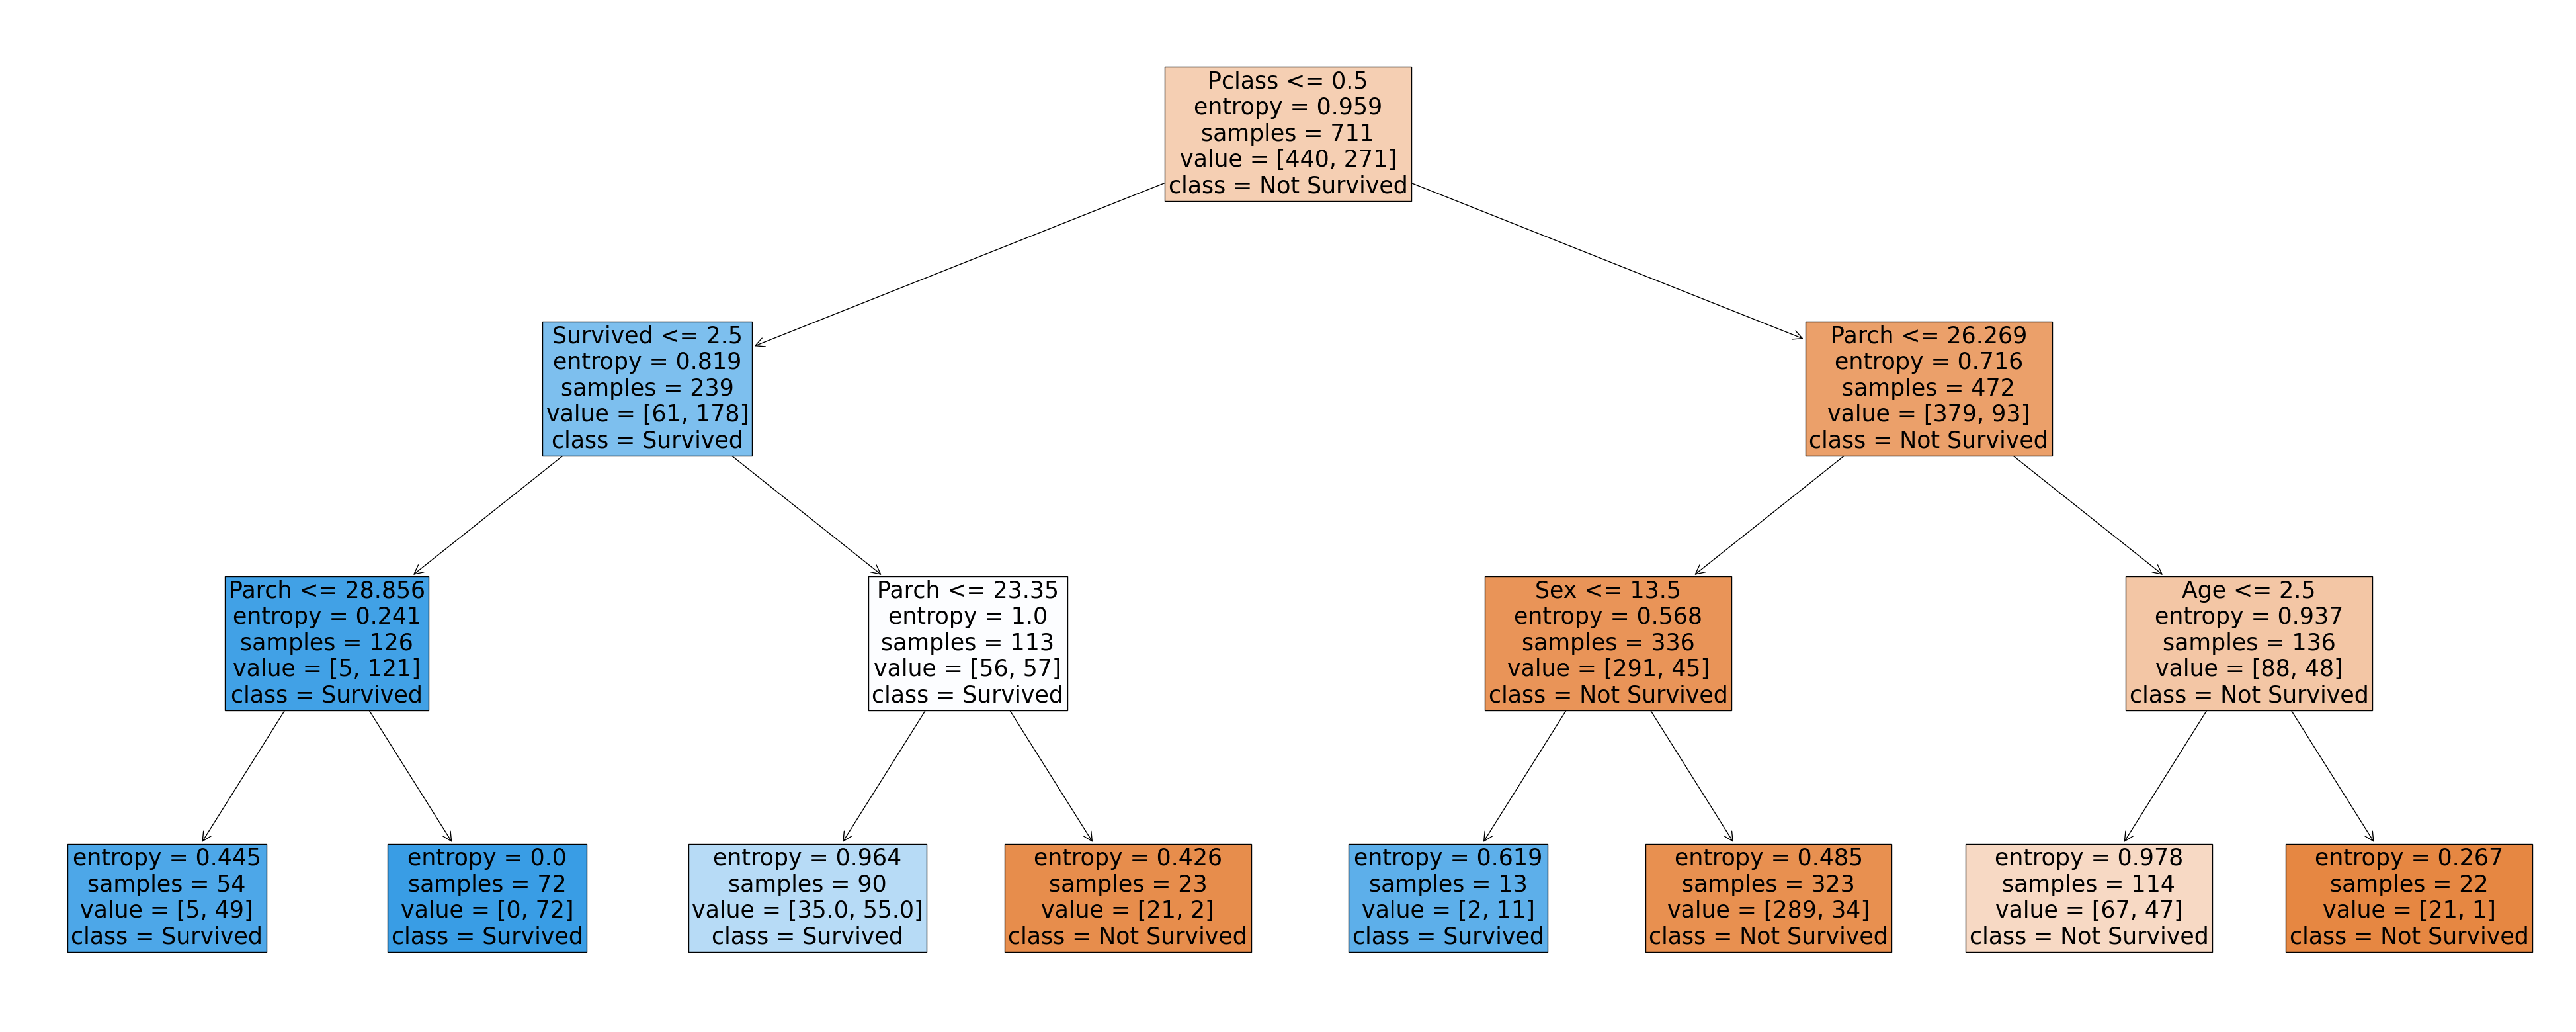

In [36]:
# Creating Visualisation with unprunned tree
plt.figure(figsize=(50,20))
features = df.columns
classes = ['Not Survived','Survived']
tree.plot_tree(pruned,feature_names=features,class_names=classes,filled=True,fontsize=25)
plt.show()